In [ ]:
# Essential imports
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Directory containing the CSV files
input_directory = 'path/FDextracted/'
output_directory = 'outputpath'

# Define the columns for the methods
methods = ["Alencar et al.", "Noguera et al.", "Osman et al.", 
                  "Ford and Labosier", "Pendergrass et al.", "Christian et al."]

### Calculate the mean duration of the events per method per HUC4

In [64]:
# Initialize a dictionary to store results
results = {}

# Get a list of all CSV files in the specified folder
file_list = glob.glob(os.path.join(input_directory, 'result_HUC4_*.csv'))

In [65]:
# Initialize a dictionary to store results
results = {}

# Iterate over each CSV file
for file_name in file_list:
    # Extract HUC4 code from the file name
    huc4_code = os.path.splitext(os.path.basename(file_name))[0].split('_')[-1]

    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(file_name)

    # Convert the 'Date' column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Initialize event stats for each method
    method_event_stats = {}

    # Iterate over each method to compute stats
    for method in methods:
        event_started = False
        event_days = 0
        event_count = 0

        # Iterate over each row
        for _, row in df.iterrows():
            if row[method] == 1:
                if not event_started:
                    event_count += 1
                    event_started = True
                event_days += 1
            elif row[method] == 0 and event_started:
                event_started = False

        # Store stats for this method (not by year)
        method_event_stats[method] = {
            'number_of_events': event_count,
            'number_of_days': event_days,
            'mean_duration': event_days / event_count if event_count > 0 else 0
        }

    # Store results for this HUC4 code
    results[huc4_code] = method_event_stats

# Create a DataFrame to store all results
all_results = []

# Flatten results dictionary into a list of rows
for huc4_code, method_stats in results.items():
    for method, stats in method_stats.items():
        all_results.append([
            huc4_code,
            method,
            stats['number_of_events'],
            stats['number_of_days'],
            stats['mean_duration']
        ])

# Create a DataFrame
results_df = pd.DataFrame(all_results, columns=[
    'HUC4 Code', 'Method', 'Number of Events', 'Number of Days', 'Mean Duration'])

In [67]:
#Filter the mean duration lower than 14
filtered_mean_duration_df = results_df[(results_df['Mean Duration'] < 14)
                                       &
                                       (results_df['Mean Duration'] >0)]

In [69]:
# Compute mean duration per HUC4 per method (averaged across years)
mean_duration_df = results_df.groupby(['HUC4 Code', 'Method'])['Mean Duration'].mean().reset_index()

In [41]:
mean_duration_df = mean_duration_df.drop(columns=['HUC4 Code'])

In [73]:
# Create a dictionary to assign specific colors for each method (event_type)
method_colors = {
    'Alencar et al.': "#48787E",  
    'Noguera et al.': "#B1B455",         
    'Osman et al.': "#658859",    
    'Ford and Labosier': "#658859", 
    'Pendergrass et al.': "#3D5142",
    'Christian et al.': "#3D5142" 
}

In [74]:
# Define your desired method order
method_order = [
    'Alencar et al.', 
    'Noguera et al.',
    'Osman et al.', 
    'Ford and Labosier',
    'Pendergrass et al.', 
    'Christian et al.', 
]

C:\Users\gqg5266\AppData\Local\Temp\ipykernel_7000\2565160169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=mean_duration_df, x='Method', y='Mean Duration',


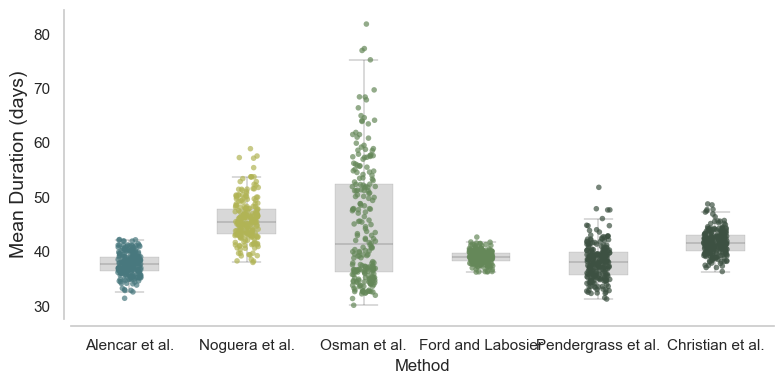

In [81]:
# Set plot style
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(8, 4))

# Overlay stripplot (dots for each HUC4)
sns.stripplot(data=mean_duration_df, x='Method', y='Mean Duration',
              palette=method_colors,
              jitter=True, alpha=0.7, size=4,
              order=method_order)

sns.boxplot(data=mean_duration_df, x='Method', y='Mean Duration', color='gray',
            linewidth=0.3, width=0.5, boxprops=dict(alpha=0.3)
            ,order=method_order, showfliers=False)


# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add title and labels
plt.ylabel('Mean Duration (days)', fontsize=14)

# Remove the y-axis gridlines
plt.grid(False)

# Remove spines for a cleaner look
sns.despine(offset=5, trim=False)

# Tight layout and show
plt.tight_layout()

#Save the figure
output_file = os.path.join(output_directory, 'mean_duration_boxplot.png')
plt.savefig(output_file, dpi=400)

plt.show()